In [90]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

In [91]:
import tensorflow_datasets as tfds

In [92]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [93]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [95]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [96]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

FIND: ЌҐЇа ўЁ«м­л© д®а¬ в Ї а ¬Ґва 


In [97]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [98]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [99]:
IMG_SHAPE = 150
BATCH_SIZE = 64

In [100]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [101]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='binary')

Found 2000 images belonging to 2 classes.


In [102]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [103]:
sample_training_images, _ = next(train_data_gen)

In [151]:
def plotImages(images_arr, count):
  fig, axes = plt.subplots(1, count, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

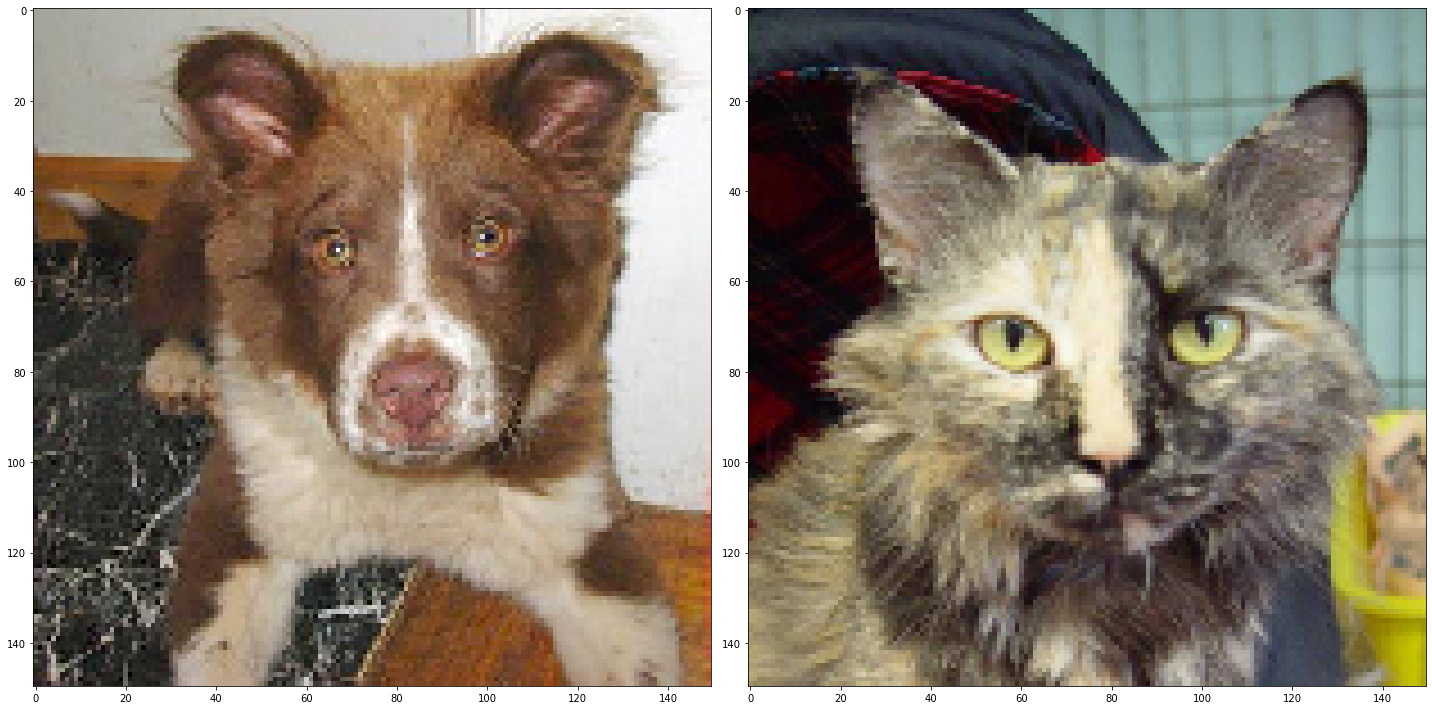

In [125]:
plotImages(sample_training_images[:2])

In [106]:
base_model = tf.keras.applications.regnet.RegNetY320(
    model_name='regnety320',
    include_top=False,
    include_preprocessing=True,
    input_tensor=None,
    input_shape=(IMG_SHAPE, IMG_SHAPE, 3),
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [107]:
flatten_layer = layers.Flatten()
dropout_1 = layers.Dropout(0.2)
batch_normalization_1 = layers.BatchNormalization()
dropout_2 = layers.Dropout(0.2)
batch_normalization_2 = layers.BatchNormalization()
dropout_3 = layers.Dropout(0.2)
dense_layer_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(128, activation='relu')
prediction_layer = layers.Dense(1, activation='sigmoid')

model = Sequential([
    base_model,
    flatten_layer,
    dropout_1,
    dense_layer_1,
    dropout_2,
    batch_normalization_1,
    dense_layer_2,
    dropout_3,
    batch_normalization_2,
    prediction_layer
])

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 regnety320 (Functional)     (None, 5, 5, 3712)        141492058 
                                                                 
 flatten_3 (Flatten)         (None, 92800)             0         
                                                                 
 dropout_9 (Dropout)         (None, 92800)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               23757056  
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                      

In [76]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [108]:
optimizer = 'adam'

In [109]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [110]:
EPOCHS = 5
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

C:\Users\Damir4k\AppData\Local\Temp/ipykernel_3608/2622323609.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
32/32 [==============================] - 2928s 91s/step - loss: 0.2283 - accuracy: 0.9010 - val_loss: 0.5712 - val_accuracy: 0.7540
Epoch 2/5
32/32 [==============================] - 2990s 96s/step - loss: 0.1166 - accuracy: 0.9585 - val_loss: 0.1944 - val_accuracy: 0.9360
Epoch 3/5
32/32 [==============================] - 2828s 88s/step - loss: 0.0295 - accuracy: 0.9930 - val_loss: 0.1582 - val_accuracy: 0.9550
Epoch 4/5
32/32 [==============================] - 2856s 89s/step - loss: 0.0366 - accuracy: 0.9880 - val_loss: 0.6018 - val_accuracy: 0.8430
Epoch 5/5
32/32 [==============================] - 3033s 97s/step - loss: 0.0650 - accuracy: 0.9795 - val_loss: 0.2801 - val_accuracy: 0.9100


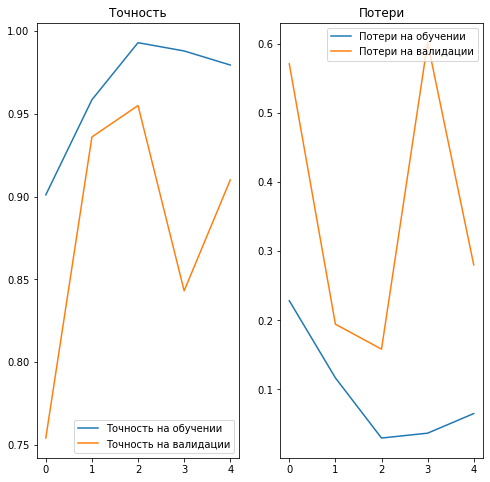

In [219]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери')
plt.savefig('./foo.png')
plt.show()

In [212]:
filePathes = ['dog5.jpeg', 'dog5.jpg', 'dog6.jpg', 'dog3.jpg', 'cat2.jpg', 'cat3.jpeg', 'cat4.jpg']

In [213]:
def prepare_data(filepath):
    image1 = image.load_img(filepath, target_size = (150, 150))
    transformedImage = image.img_to_array(image1)
    transformedImage = np.expand_dims(transformedImage, axis = 0)
    return transformedImage

In [217]:
def plotImages2(filePathes, count):
    images = []
    for i in range(0, count):
        images.append(image.load_img(filePathes[i], target_size = (150, 150)))
    fig, axes = plt.subplots(1, count, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

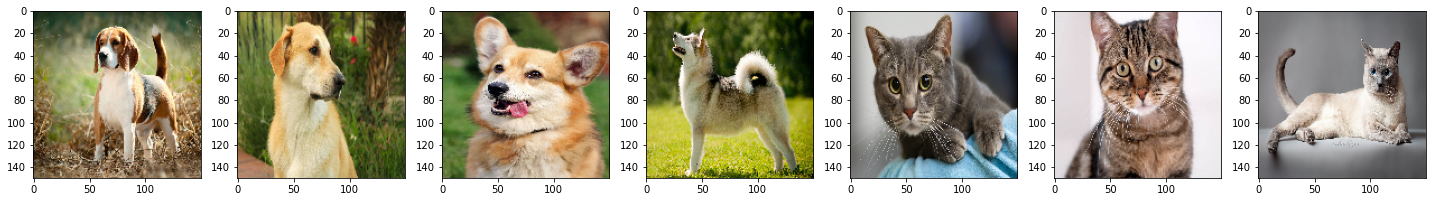

In [218]:
plotImages2(filePathes, 7)

In [214]:
for fileName in filePathes:
    prediction = model.predict(prepare_data(fileName))
    #print(prepare_data(fileName))
    print(prediction)

1/1 [==============================] - 0s 230ms/step
[[7.478863e-08]]
1/1 [==============================] - 0s 251ms/step
[[1.7505195e-06]]
1/1 [==============================] - 0s 263ms/step
[[8.1941675e-05]]
1/1 [==============================] - 0s 238ms/step
[[6.3286216e-06]]
1/1 [==============================] - 0s 240ms/step
[[1.998235e-06]]
1/1 [==============================] - 0s 238ms/step
[[2.1665392e-05]]
1/1 [==============================] - 0s 246ms/step
[[1.1310104e-06]]
